In [1]:
import numpy as np
import networkx as nx

In [5]:
G = nx.Graph()

# Hex codes for colors if we draw graph
blue, orange, green = "#1f77b4", "#ff7f0e", "#2ca02c"

G.add_nodes_from(nodes_for_adding=[
        (1, {'color': blue}),
        (2, {'color': orange}),
        (3, {'color': blue}),
        (4, {'color': green}),
    ])

In [7]:
G.add_edges_from([
    (1,2),
    (2,3),
    (1,3),
    (3,4)
])

A = np.asarray(nx.adjacency_matrix(G).todense())

In [8]:
print(A)

[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


In [10]:
def build_graph_color_label_representation(G, mapping_dict):
    one_hot_idxs = np.array([mapping_dict[v] for v in
            nx.get_node_attributes(G, 'color').values()])

    one_hot_encoding = np.zeros(    
    (one_hot_idxs.size, len(mapping_dict)))

    one_hot_encoding[
    np.arange(one_hot_idxs.size), one_hot_idxs] = 1

    return one_hot_encoding

X = build_graph_color_label_representation(G, {green: 0, blue: 1, orange: 2})

In [11]:
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

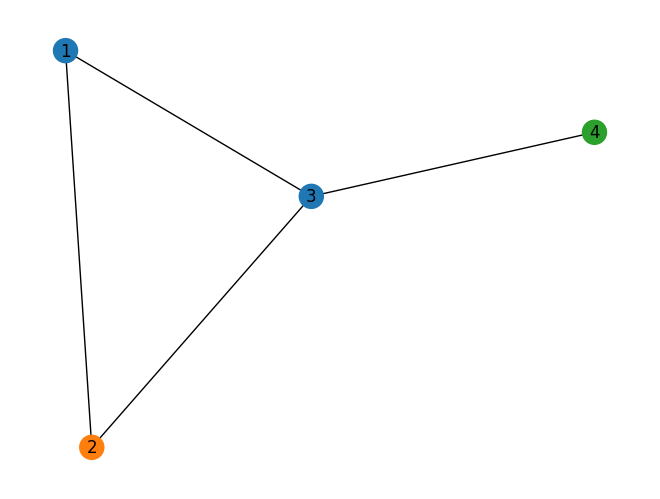

In [24]:
color_map = nx.get_node_attributes(G, 'color').values()
nx.draw(G,with_labels=True, node_color=color_map)